# Homework 4 [50 POINTS]

## Statement of Non-cheating and honest collaboration:

I have been informed of the academic honesty policies of Georgia State University. I will abide by those policies. I have written up the solutions below by myself and understand what I have turned in. I collaborated and discussed the problems with the following people: ```Paige```

Signed,
```Jesse Annan```

__Please change the notebook's name and add your name before submitting.__

## Mobile Price Prediction

In this homework, you will analyze and create a predictive model for predicting the price range of mobile phones using a dataset that describes the features of mobile phones. Each row in the dataset represents the specifications of a mobile phone and the target feature is an ordinal variable representing the price range. This dataset that has the following descriptive features. 

- battery_power: Battery power in mAh
- blue: Has bluetooth or not
- clock_speed: Processor clock speed
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Depth of the phone in cm
- mobile_wt: Weight of the phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: RAM in Megabytes
- sc_h: Screen height in cm
- sc_w: Screen Width in cm
- talk_time: Longest talk time in hours
- three_g: Has 3G or not
- touch_screen: Has touchscreen or not
- wifi: Has WiFi or not

Your task is to use similarity-based and probability-based learning models to predict the price range of the phone (See `price_range` feature). Below you will find a code snippet to read and describe the dataset. Please make sure your notebook is in the same folder as the dataset file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target_feature = 'price_range'
mobiledf = pd.read_csv('mppp_data.csv')

mobiledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [2]:
mobiledf.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Q-1) What are some ways to visualize the relationships between multiple features in the dataset, and what insights can you gain from examining these relationships? [7 POints]

Hint: Create a pair plot of the features versus the price range. Create a correlation heatmap of the features

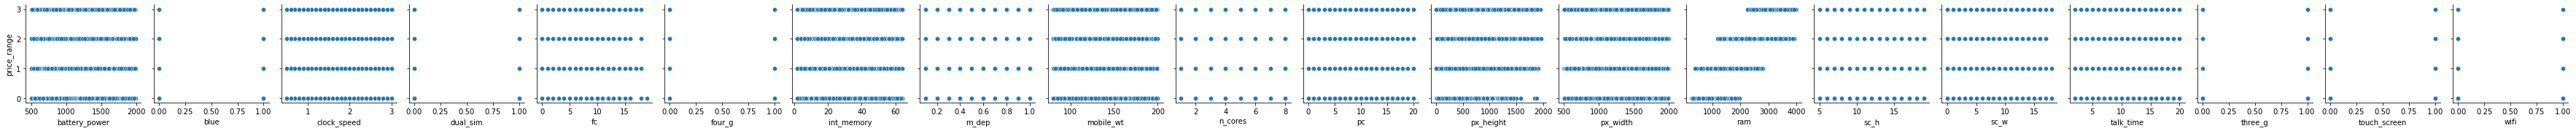

In [3]:
features = mobiledf.drop('price_range', axis=1).columns.to_list()
pplot = sns.pairplot(mobiledf, x_vars=features, y_vars=target_feature)
plt.show()

##### Remark
From the pairplot, other than ```ram``` there seem to be no linear relationship between the attributes and price_range.

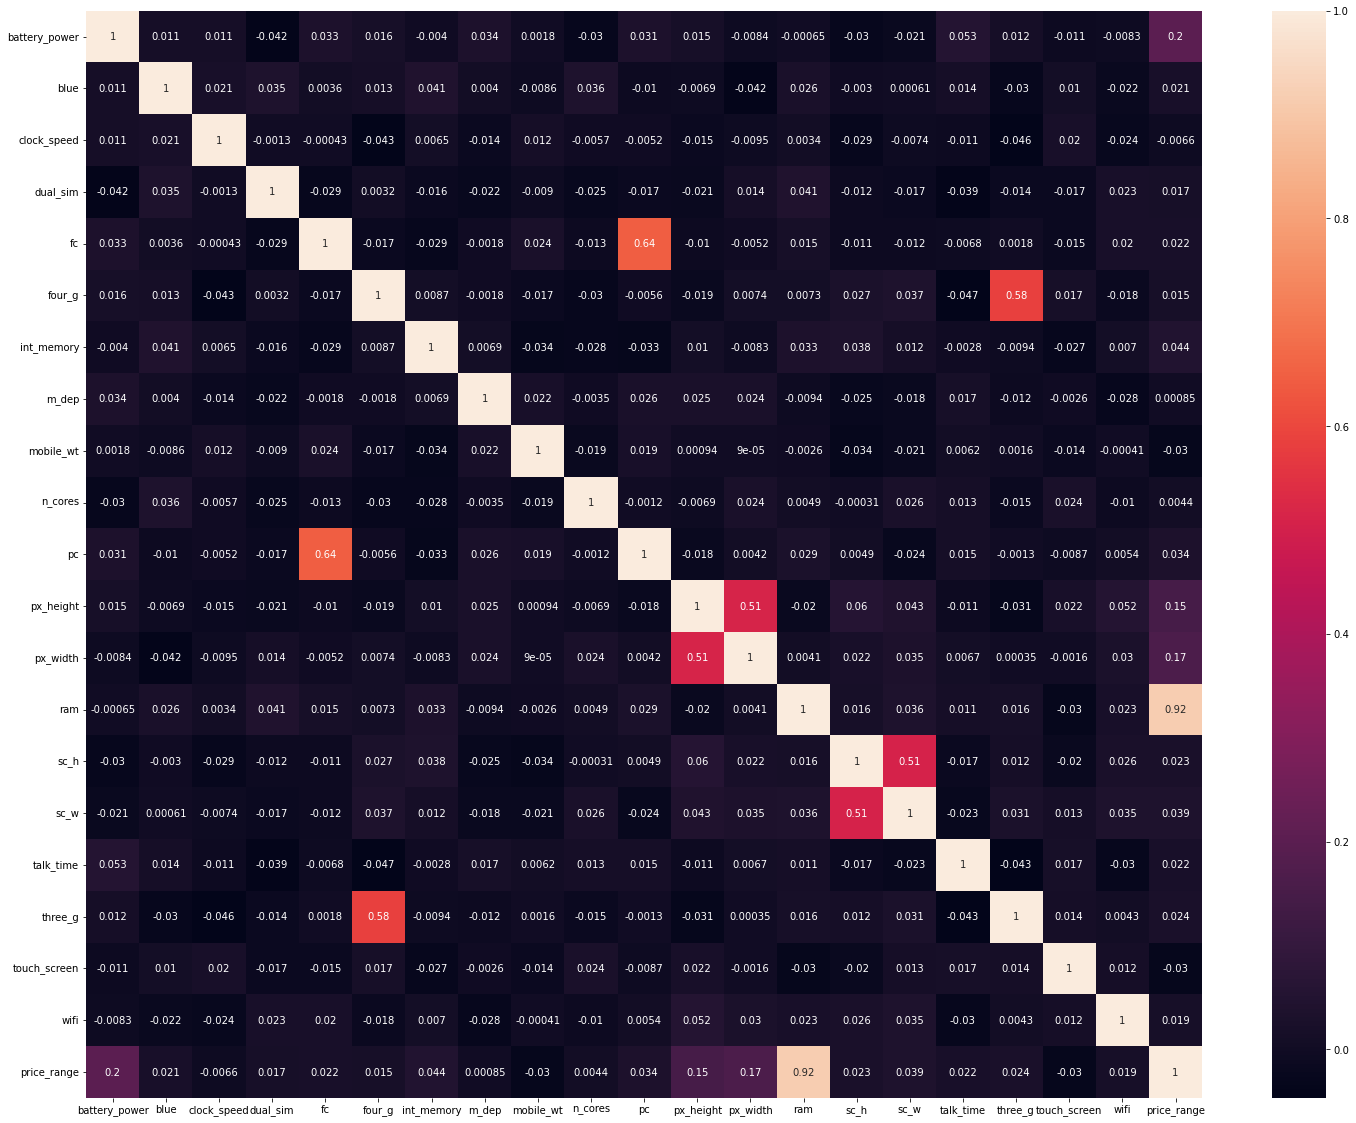

In [4]:
plt.figure(figsize=(25,20))
sns.heatmap(mobiledf.corr(), annot=True, cmap='rocket')
plt.show()

#### Remark
The heatmap confirms my absumptions from the pairplot - the seem to be no lenear relationship between the features. However, with a correlation of more than 0.51, 0.51, 0.64, and 0.92 we can conclude that as screen height and pixel resolution height increases the screen width and pixel resolution width of the phone increases as well, furthermore, the presense of a front camera means there is a primary camera on the phone, and lastly increasing ram size increases the price range of the phone.

### Q-2) How can you create a stacked bar chart of the number of phones in each price range, grouped by the presence of 3G, 4G, and Bluetooth capabilities? What insights can you gain from this chart? [7 Points]
Hint: 
1. Group the data by the presence of 3G, 4G, Bluetooth, and price range. You can use pandas groupby() function.
2. Create a stacked bar chart using seaborn. You can use You can use seaborns catplot() function.

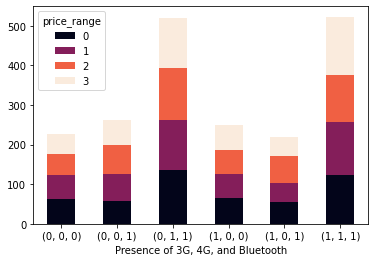

In [5]:
phones = mobiledf.groupby(['blue', 'four_g', 'three_g'])['price_range'].value_counts().unstack()
phones.plot(kind='bar', stacked=True, colormap='rocket', rot=0, xlabel="Presence of 3G, 4G, and Bluetooth")
plt.show()

#### Remark
Based on the stacked bar chart, there are as many phones with `4G, bluetooth` capabilities and `3G, 4G, bluetooth` capability. The same could be said about phones with `only 3G` are as much as phones with only `only bluetooth` and also phones `without 3G, 4G, bluetooth` capability are as much as phones with `3G, bluetooth` capabilities. 

### Q-3) How can you create a scatter plot matrix of all numerical features in the dataset, colored by the price range? What insights can you gain from this plot? [7 Points]

Hint: To create a scatter plot matrix of all numerical features in the dataset, colored by the price range, you can use the pairplot() function in seaborn, which creates a matrix of scatter plots for all pairs of numerical features in the dataset. You can use the hue parameter of the pairplot() function to color the points in each plot according to the price range.

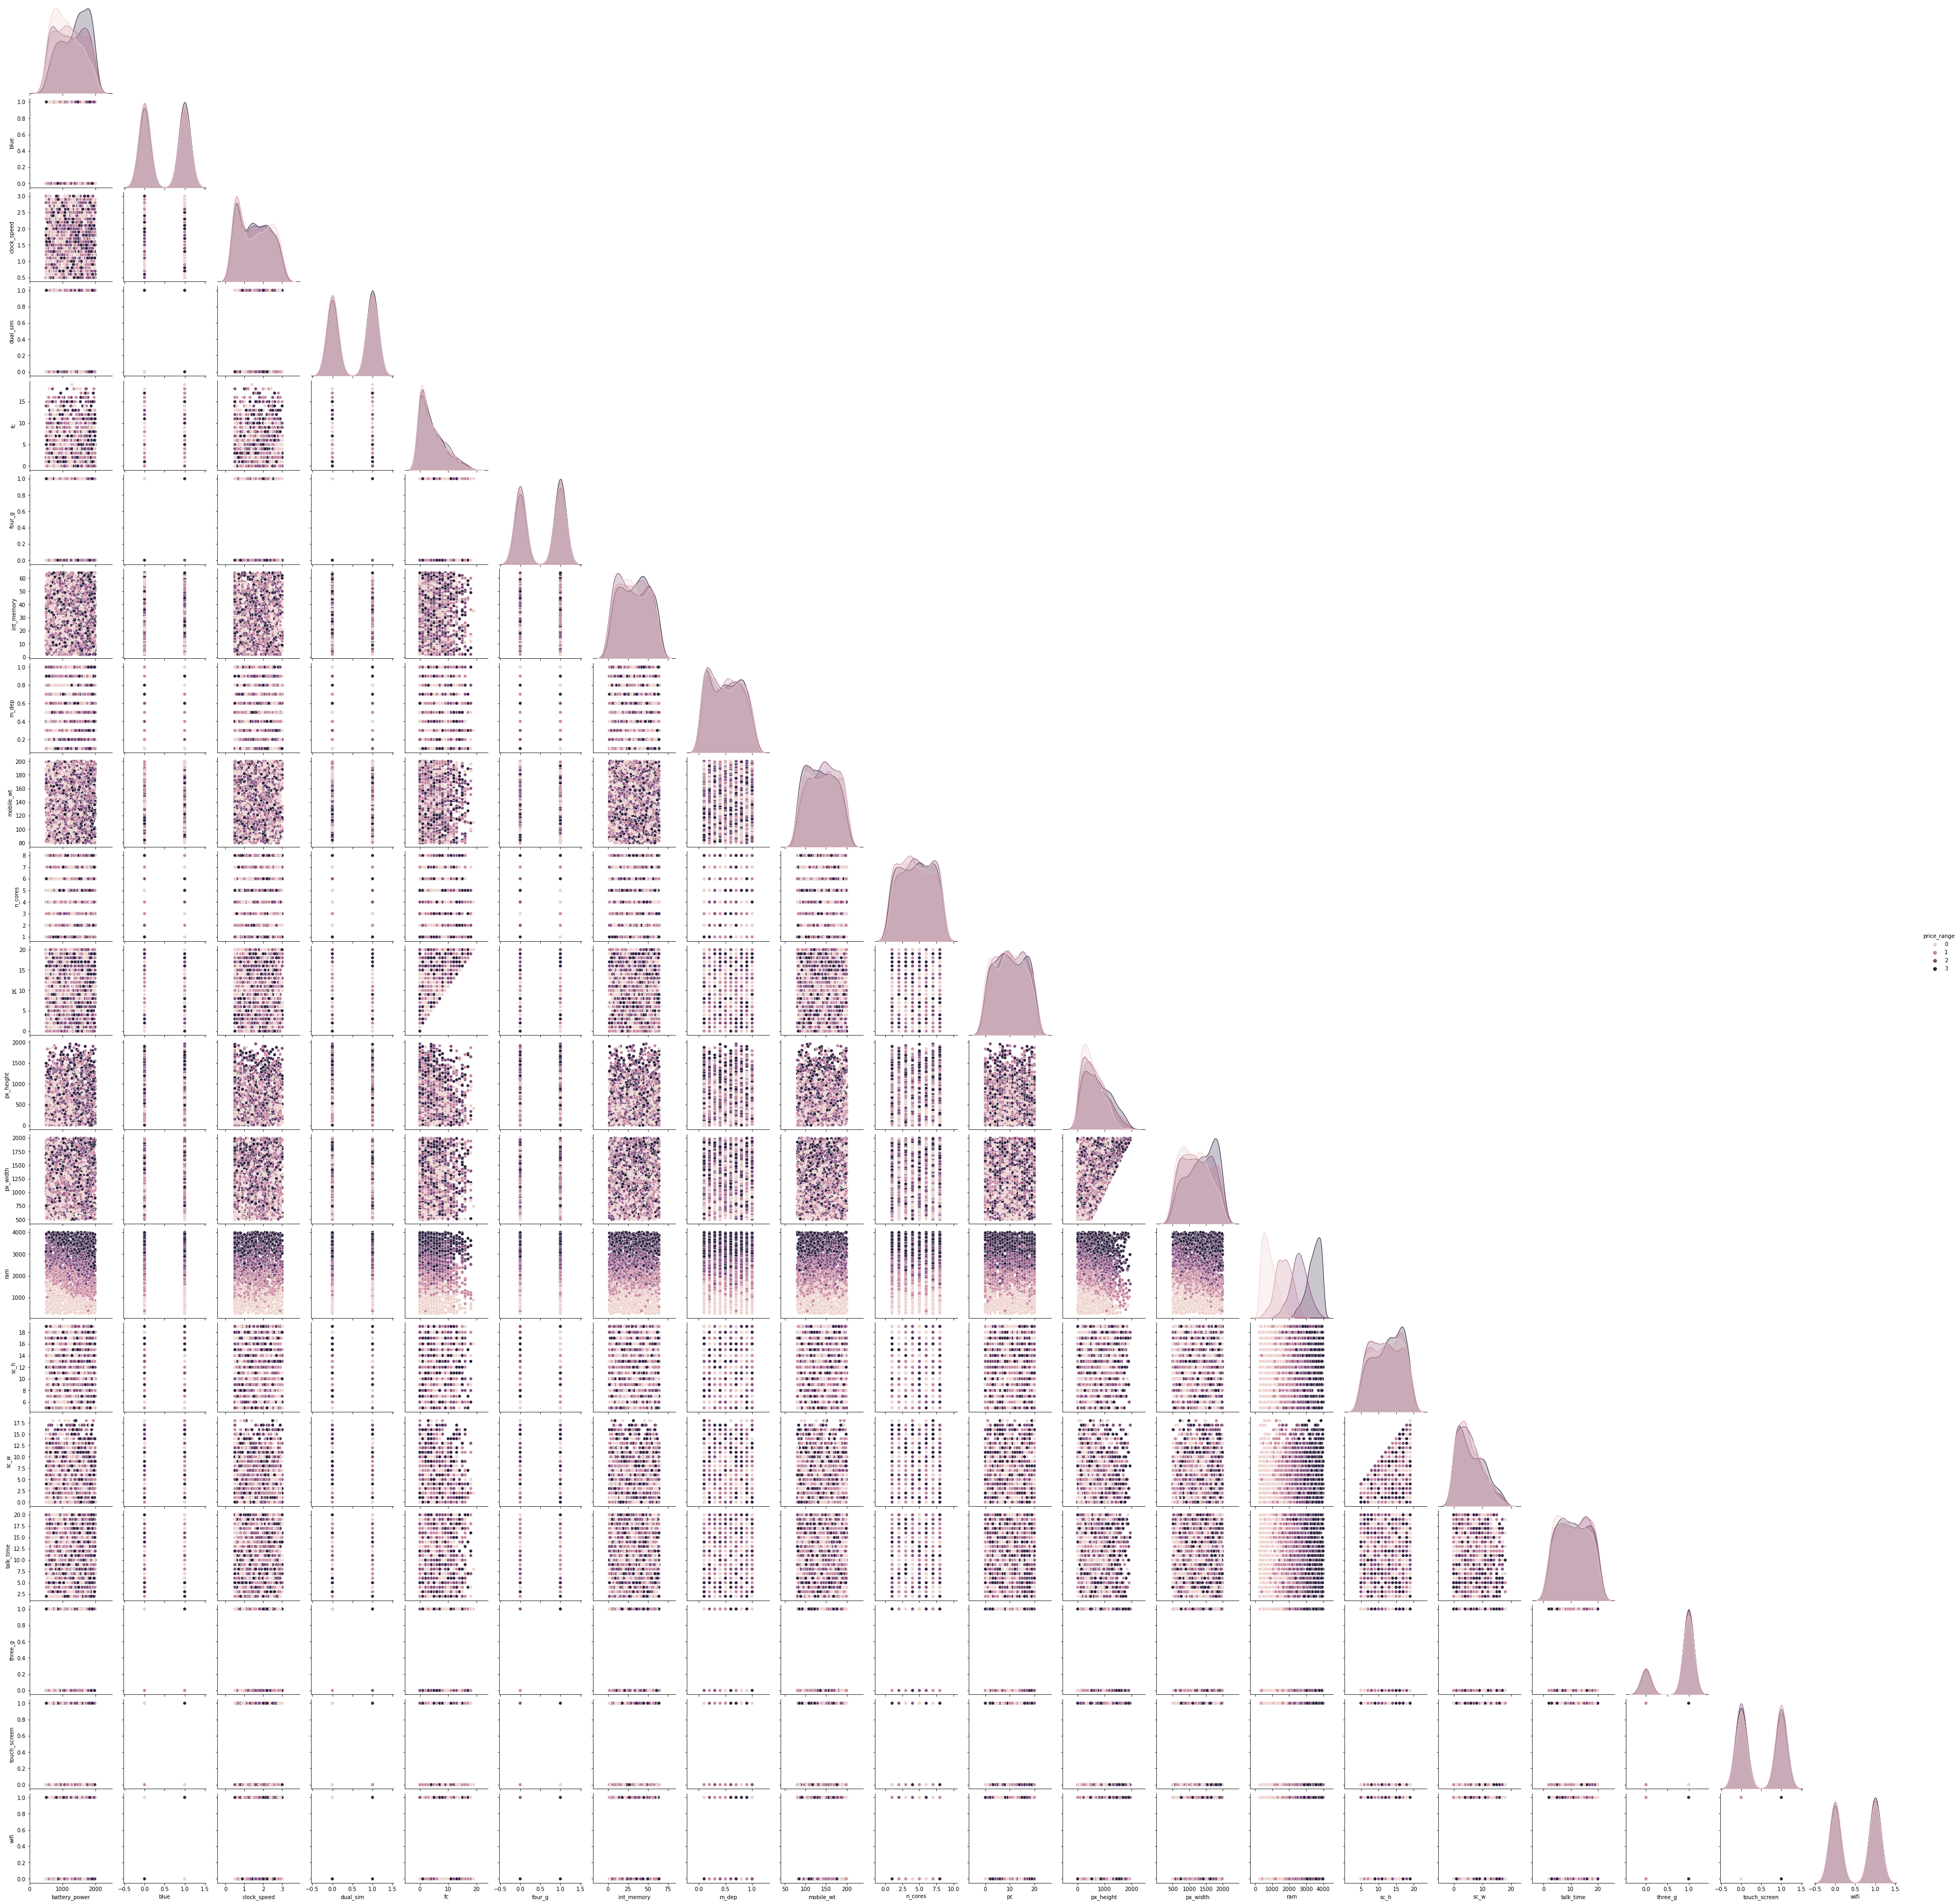

In [6]:
sns.pairplot(mobiledf, diag_kind='kde', corner=True, hue='price_range')
plt.show()

### Q-4) How can you create a box plot of the price range versus the number of cores in the processor, and what insights can you gain from this plot? [7 Points]

Hint: To create a box plot of the price range versus the number of cores in the processor, you can use the boxplot() function in seaborn, which creates a box plot for each category of the x-axis variable (in this case, the number of processor cores) and shows the distribution of the y-axis variable (the price range) within each category.

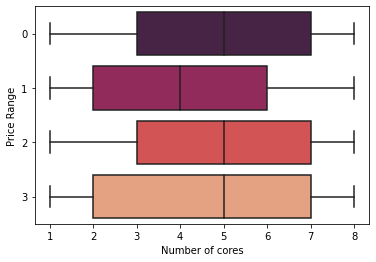

In [7]:
sns.boxplot(data=mobiledf, x='n_cores', y='price_range', palette='rocket', orient='h')
plt.xlabel('Number of cores')
plt.ylabel('Price Range')
plt.show()

### Q-5) How can you use a violin plot to visualize the distribution of internal memory in gigabytes for phones with and without 4G capability, grouped by the price range, and what insights can you gain from this plot? [7 Points]
Hint: Create a violin plot with the price range on the x-axis, the internal memory on the y-axis, and each violin representing the distribution of internal memory for phones with and without 4G capability. The plot should be split in half for each price range, with the left half representing phones without 4G capability and the right half representing phones with 4G capability. The colors of the violins should be based on whether the phone has 4G capability or not, and the legend should show the corresponding colors.

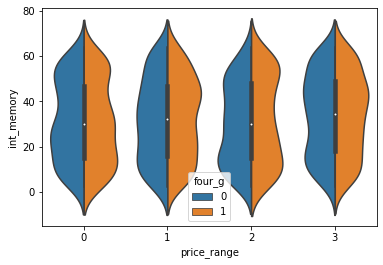

In [8]:
sns.violinplot(data=mobiledf, x="price_range", y="int_memory", hue="four_g", split=True, cmap='rocket')
plt.show()

### Q-6) How can you use seaborn's relplot() function to visualize the relationship between battery power and RAM, colored by the price range, and grouped by the number of cores and presence of 4G? What insights can you gain from this plot? [7 Points]

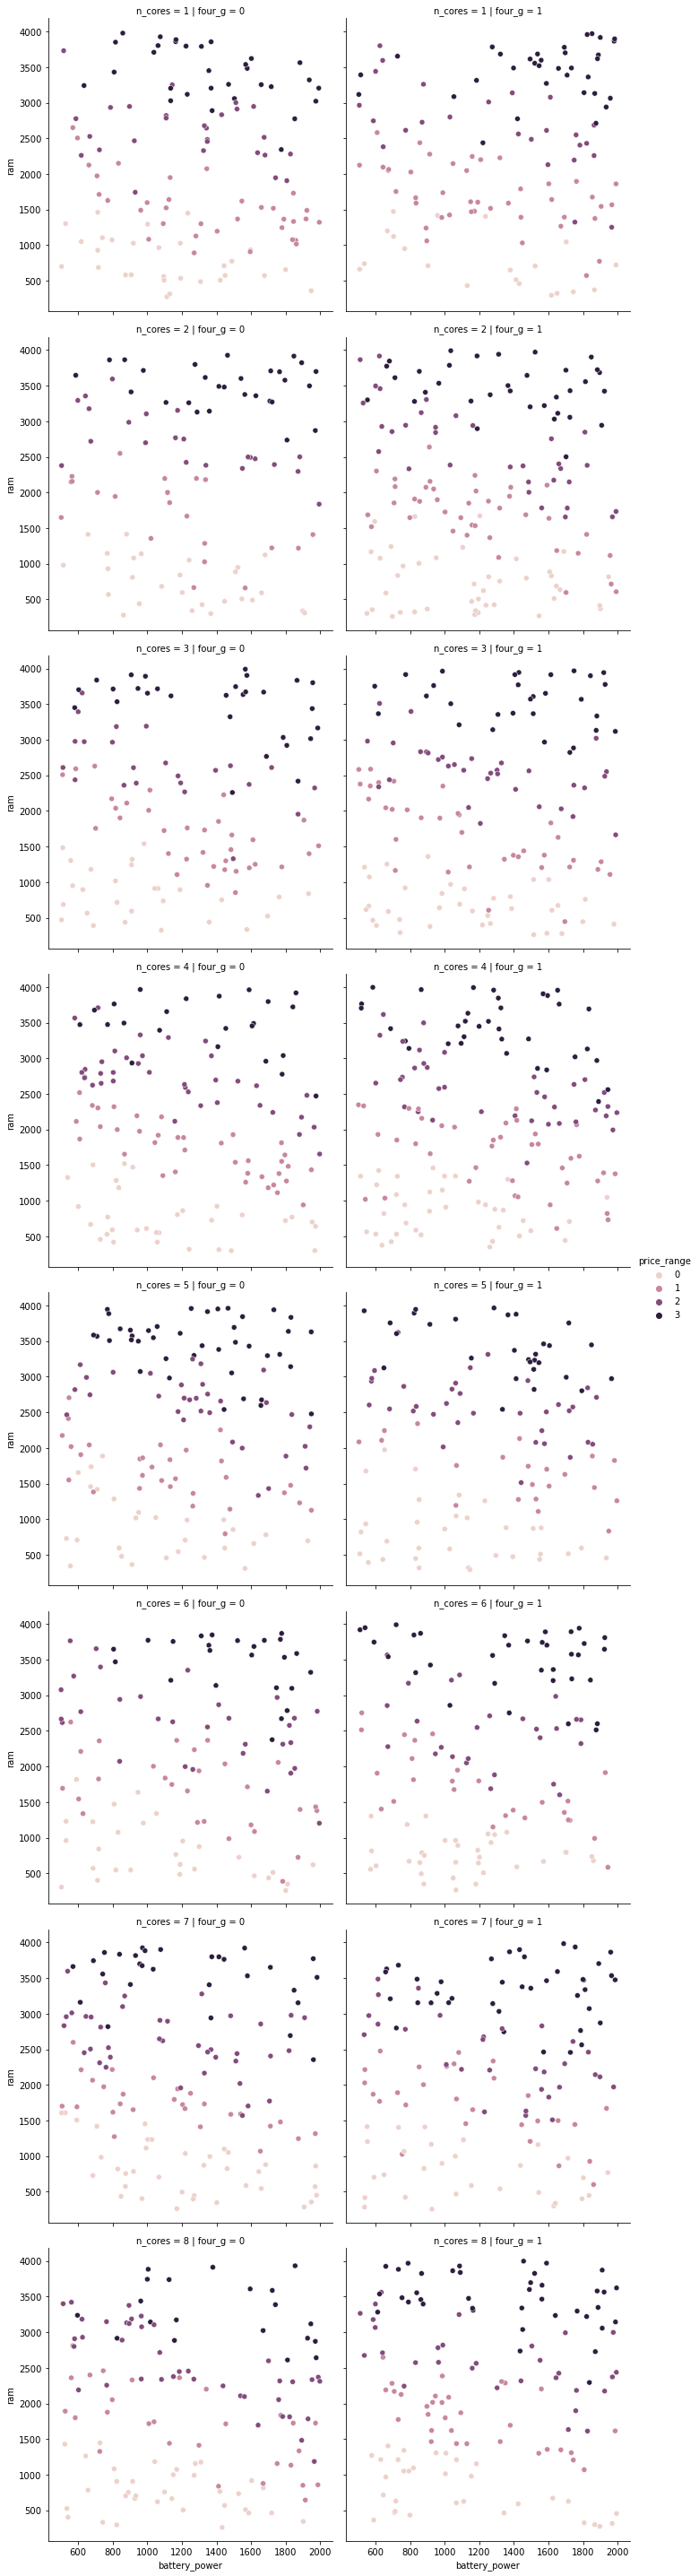

In [9]:
sns.relplot(data=mobiledf, x='battery_power', y='ram',
            hue='price_range', row='n_cores', col='four_g', cmap='rocket')
plt.show()

### Q-7) How can you use seaborn's facetgrid() to create a grid of histograms that shows the distribution of the 'battery_power' feature for each price range, with each histogram colored by the 'dual_sim' feature? What insights can you gain from this plot? [8 Points]
Hint: Pass the dataframe to the function and specify that you want to create a grid of plots with one column for each unique value of the 'price_range' column in the dataframe.

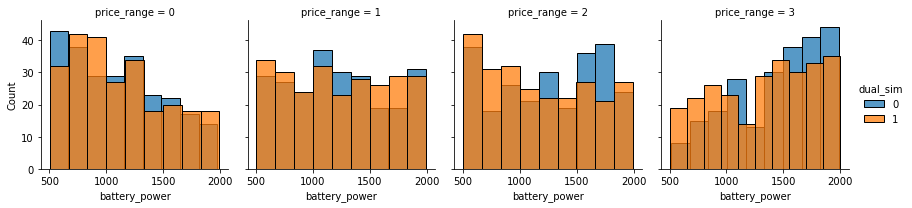

In [10]:
graphs = sns.FacetGrid(mobiledf, col='price_range', hue='dual_sim')
graphs.map(sns.histplot,'battery_power')
graphs.add_legend()
plt.show()

#### Remark
From our graphs, we can conclude that the number of sims the phone can take doesn't really affect the price of the phone since the distribution of single sim and dual sim are roughly similar in each price range.